# Analytics for Titanic: Machine Learning from Disaster
given the dataset of Titanic Disaster , what insights can we get from it ?

![Titanic app](https://www.masaldzhiyski.com/images/titanic-kaggle.jpg)

[source](https://www.kaggle.com/c/titanic/data)

## Fisrt reading the csv file of titainc
## Second Clean and preproccess it,
## 3rd we will split it to train and test datasets for future use.


# Note All charts here is on unncleand data set called titanic
## and in  future i will put charts using the train and test datasets and its pridctions.

# Reading 

In [158]:
# import first
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = "18"
sns.set(style='white', context='notebook', palette='deep')
# change the style from the very beging
plt.style.use('ggplot')
%matplotlib inline

In [159]:
titan = pd.read_csv('titanic train.csv')
titan.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [160]:
titan.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [161]:
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Cleaning and preprocessing:

### First we Will drop the rows only if all of the values in the row are missing:

In [162]:
titan.dropna(how = 'all',inplace = True)

### Handling the missing data

In [163]:
#lets see which have null values
titan.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### As you can see we have 
#### Age with 177 nan value, Cabin with 687 nan values and Embarked with 2 values:
## Now we will remove them or replace them:

### For Age we will replace nana with mean:

In [164]:
#importing sklrn
from sklearn.preprocessing import Imputer

clean_dataset = titan
imputer = Imputer(missing_values='NaN', strategy='mean',axis=0)
clean_dataset[['Age']] = imputer.fit_transform(clean_dataset[['Age']])
clean_dataset

F:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### Embarked is categorical feature so we fill in the missing values with the most common value(mode) as illustrated below:

In [165]:
clean_dataset['Embarked'].fillna(clean_dataset['Embarked'].mode()[0], inplace=True)
#train_matrix = train_matrix.drop(train_matrix.loc[(titan['Embarked'].isna()), 'Embarked'].index)

### Now we see that unique ferquency can help us to drop some columns like tickets

In [166]:
clean_dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Cook, Mr. Jacob",male,CA. 2343,G6,S
freq,1,577,7,4,646


### Caben is categrial and we can use another way to replaced But here caben will not effect our goal beacuase its have Nan more than 70% so we will drop it 
### Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
### PassengerId may be dropped from training dataset as it does not contribute to survival.
### Name feature is relatively non-standard, may not contribute directly to survival, so it will be dropped:

In [167]:
clean_dataset = clean_dataset.drop(['Cabin','Ticket','PassengerId','Name'], axis=1)

### Now Our data is clean now for the encoding and droping some uneeded columns:

In [168]:
#lets see which have null values
clean_dataset.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Now Encoding:

### Map Femal and male to numbers:

In [169]:
#for dataset in train_matrix:
clean_dataset['Sex'] = clean_dataset['Sex'].map( {'female': 1, 'male': 0}).astype(int)

print(clean_dataset.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S


### Converting  Embarked to numbers: s->1 c->2 q->3

In [170]:
clean_dataset['Embarked'] = clean_dataset['Embarked'].map( {'S': 1, 'C': 2 , 'Q':3}).astype(int)
print(clean_dataset.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         1
1         1       1    1  38.0      1      0  71.2833         2
2         1       3    1  26.0      0      0   7.9250         1
3         1       1    1  35.0      1      0  53.1000         1
4         0       3    0  35.0      0      0   8.0500         1


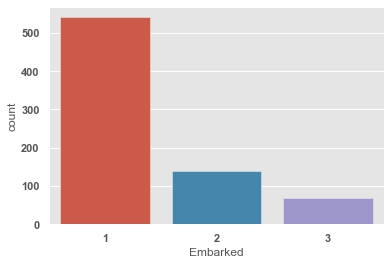

In [171]:
df_filtered = clean_dataset.loc[(clean_dataset['Age'] >= 15) & (clean_dataset['Age'] <= 50)]
sns.countplot(x="Embarked",data=df_filtered);

## now we need to seperate the dependant and independent variables "Survived is dependant"
## Before creating our train and test datasets.

In [172]:
feature_matrix = clean_dataset.drop('Survived', axis=1)
feature_matrix

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,2
2,3,1,26.000000,0,0,7.9250,1
3,1,1,35.000000,1,0,53.1000,1
4,3,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,1
888,3,1,29.699118,1,2,23.4500,1
889,1,0,26.000000,0,0,30.0000,2


In [173]:
goal_vector = clean_dataset['Survived']
goal_vector

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Creating Trian and Test datasets:

In [183]:
# import the modules 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_matrix, goal_vector, test_size = 0.3, random_state = 0)
print(len(x_train))
print(len(x_test))
print(len(features_matrix))

623
268
891


## We dont need to scale anythin, and if we do we can scale the fare

In [186]:
# # import the library we need from our beloved sklearn !
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # take a look how the values was before and after the scalling 
# print('before scalling, max is %d and min is %d'%(np.max(x_train), np.min(x_train)))
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# print('after scalling, max is %d and min is %d'%(np.max(x_train), np.min(x_train)))

# Note:                                                                                                                            All the celles Below are using the orginal dataset without Cleanning and preproccing                                                                                                     

# In future we will show you how the use of preprocced Clean dataset."train and test data", from above cells

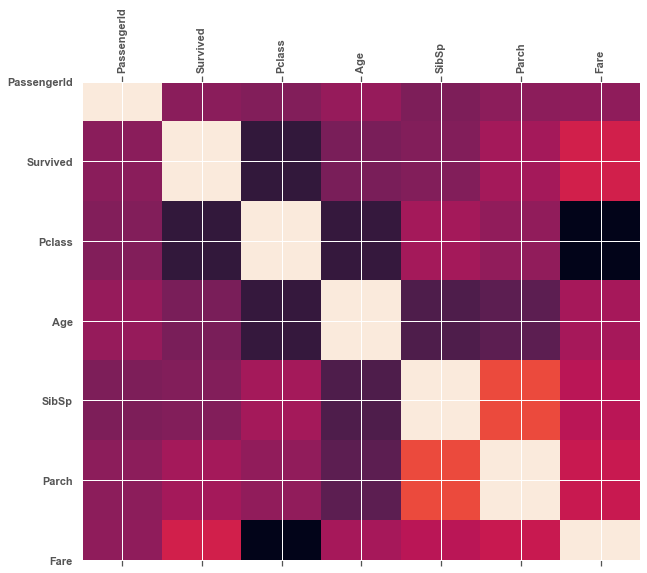

In [187]:
corr = titan.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.grid(True)
plt.show()

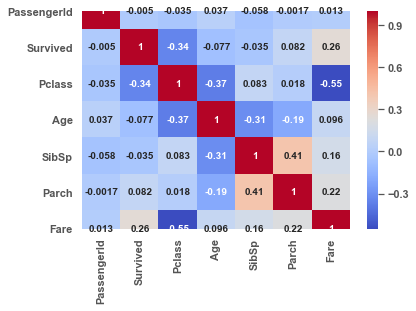

In [175]:
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")
plt.show()

In [176]:
fiter = (titan['Survived']==1) & (titan['Age']>=20) & (titan['Age']<=100) #(titan['Name'].str.slice(0, 4).astype(int)>=1993)
rank_dataset = titan[fiter]
rank_dataset = rank_dataset.sort_values(['Sex','Age'],ascending=[True,True]) 
#you can sort with this also
# rank_dataset.sort_values(['Age'], inplace=True)
rank_dataset = rank_dataset[['Name','Sex','Age']]#.head(10)
rank_dataset[['Name','Sex','Age']]

,Name,Sex,Age
56,"Rugg, Miss. Emily",female,21.0
106,"Salkjelsvik, Miss. Anna Kristine",female,21.0
627,"Longley, Miss. Gretchen Fiske",female,21.0
742,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0
141,"Nysten, Miss. Anna Sofia",female,22.0
...,...,...,...
449,"Peuchen, Major. Arthur Godfrey",male,52.0
647,"Simonius-Blumer, Col. Oberst Alfons",male,56.0
587,"Frolicher-Stehli, Mr. Maxmillian",male,60.0
570,"Harris, Mr. George",male,62.0


In [177]:
#converting the male and female to numbers so we can draw them 
#adding a new column to contain the convertion of male and female ,
#female = 1 male =0
#if there is an error happend after you excute this this means the value have been changed and the clomun Sex doews 
#not exist anymore use another variable
sex_numbers = []
for sex in rank_dataset['Sex']:
    if sex == 'male':
        sex_numbers.append(0)
    else:
        sex_numbers.append(1)
rank_dataset['sex_numbers'] = sex_numbers
sex_Dataset  = rank_dataset.copy()
sex_Dataset  = rank_dataset[['sex_numbers','Age']] 

# Male Survived Accourding to Ages between 20-100:

Text(0.5, 0, 'Age')

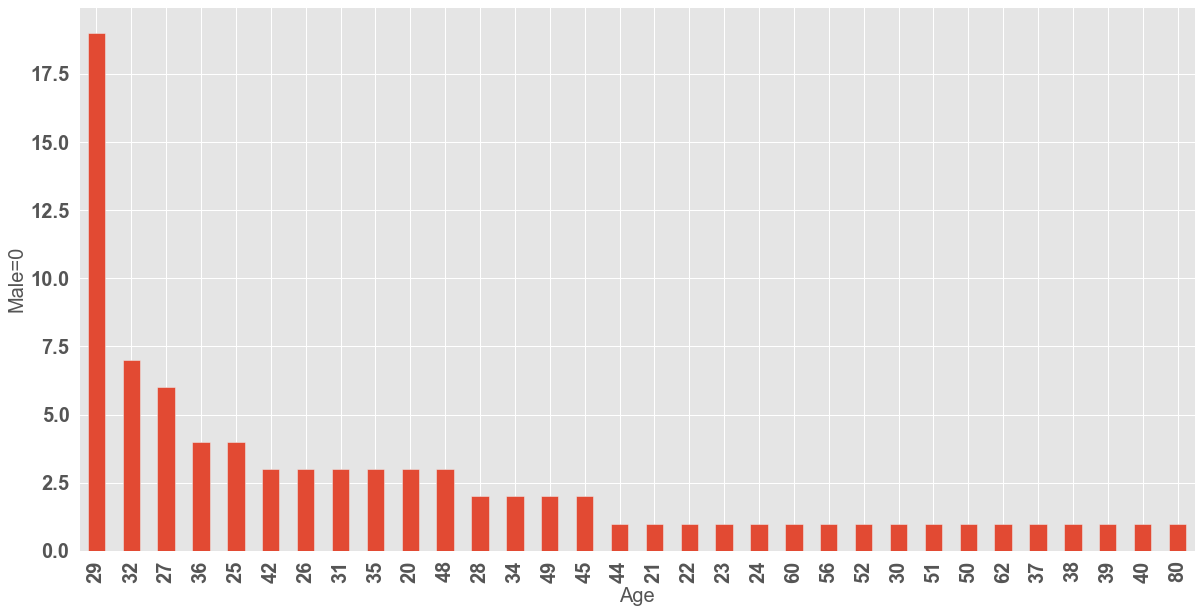

In [178]:
#Drawing bars
filter_sex = (sex_Dataset['sex_numbers']==0)
sex_Dataset = sex_Dataset[filter_sex]
#Convert age to int.
sex_Dataset['Age'] = sex_Dataset['Age'].astype(int)
sex_Dataset = sex_Dataset.sort_values(['sex_numbers','Age',],ascending=[True,True]) 
sex_Dataset.Age.value_counts().plot(kind='bar',figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Male=0',fontsize=20)
plt.xlabel('Age',fontsize=20)

# Female Survived Accourding to Ages between 20-100:

Text(0.5, 0, 'Age')

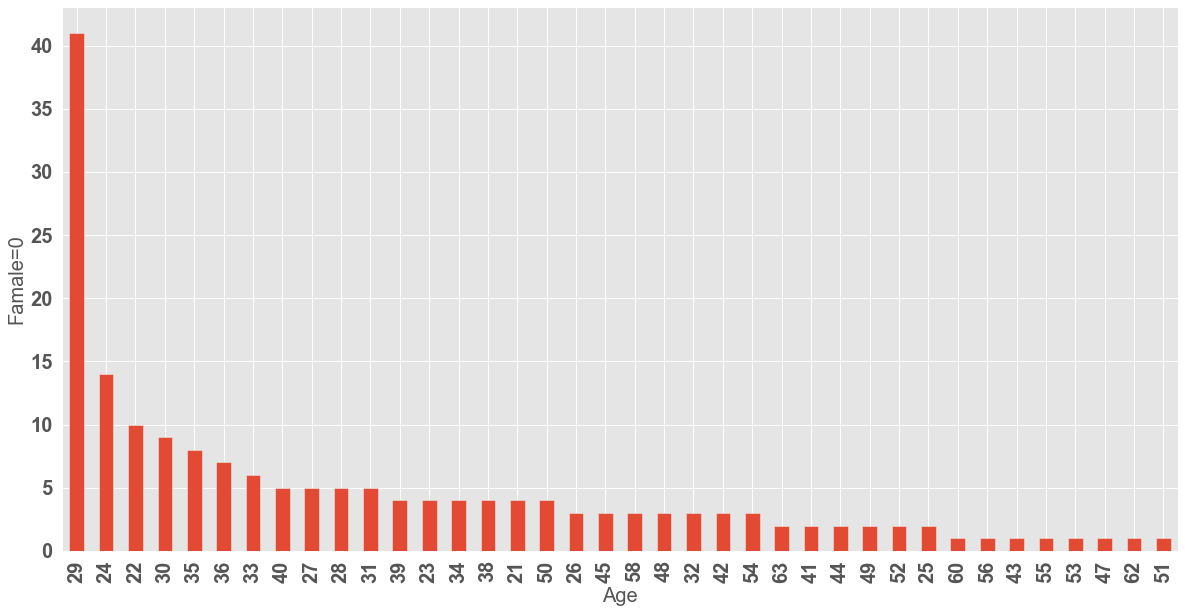

In [179]:
fiter = (titan['Survived']==1) & (titan['Age']>=20) & (titan['Age']<=100)    #(titan['Name'].str.slice(0, 4).astype(int)>=1993)
rank_dataset = titan[fiter]
rank_dataset = rank_dataset.sort_values(['Sex','Age'],ascending=[True,True]) 
#you can sort with this also
# rank_dataset.sort_values(['Age'], inplace=True)
rank_dataset = rank_dataset[['Name','Sex','Age']]#.head(10)
rank_dataset[['Name','Sex','Age']]
#converting the male and female to numbers so we can draw them 
#adding a new column to contain the convertion of male and female ,
#female = 1 male =0
#if there is an error happend after you excute this this means the value have been changed and the clomun Sex doews 
#not exist anymore use another variable
sex_numbers = []
for sex in rank_dataset['Sex']:
    if sex == 'male':
        sex_numbers.append(0)
    else:
        sex_numbers.append(1)
rank_dataset['sex_numbers'] = sex_numbers
sex_Dataset  = rank_dataset.copy()
sex_Dataset  = rank_dataset[['sex_numbers','Age']] 

#Drawing bars
filter_sex = (sex_Dataset['sex_numbers']==1)
sex_Dataset = sex_Dataset[filter_sex]
#Convert age to int.
sex_Dataset['Age'] = sex_Dataset['Age'].astype(int)
sex_Dataset = sex_Dataset.sort_values(['sex_numbers','Age',],ascending=[True,True]) 
sex_Dataset.Age.value_counts().plot(kind='bar',figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Famale=0',fontsize=20)
plt.xlabel('Age',fontsize=20)

# Rate of surviving  Passangers:

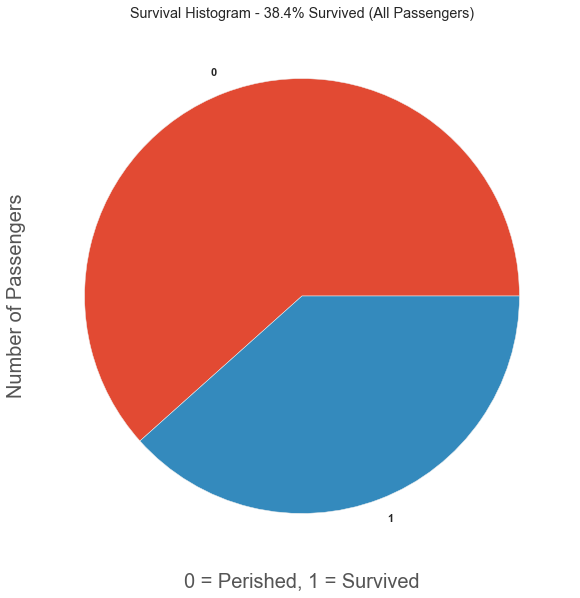

In [180]:
train = pd.read_csv('titanic train.csv')
survived = train["Survived"].value_counts()

train_s_rate = survived[1] / survived.sum()

survived.plot(kind="pie",figsize=(20,10))
plt.title("Survival Histogram - {:0.1%} Survived (All Passengers)".format(train_s_rate))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
plt.ylabel("Number of Passengers",fontsize=20)
plt.xlabel("0 = Perished, 1 = Survived",fontsize=20)
plt.show()